### http://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

# interactive in notebook
%matplotlib notebook


from mpl_toolkits.mplot3d import Axes3D
import pylab

### other module
from util_tsne import *

Automatically created module for IPython interactive environment


### training kernels

In [2]:
training_kernels = [[0.841509434,0.699166,0.845695,0,0.1,0.156,0.967049],
[0.749356223,1.611461,0.736916,0,0.2,0.3741,2.693249],
[0.263510732,0.433383,0.130578,0,0.05,0.0897,0.451053],
[0.245054945,3.621318,0.469305,0,0.55,0.8439,8.337038],
[0.163020833,1.659765,0.985557,0,0.15,0.3789,2.231894],
[0.017117117,0.89968,0.867267,0,0.15,0.2176,1.1261],
[0.016666667,0.915847,0.866627,0,0.15,0.2164,1.143948],
[0.012063492,0.803832,0.864758,0,0.15,0.1964,1.132905],
[0.085321101,2.855849,0.974629,0,0.3,0.6225,4.848462],
[0.000976412,0.413031,0.352385,1,0.1,0.0933,0.391748],
[0.022222222,1.125201,0.747835,0,0.15,0.247,1.562166],
[0.004683826,3.445772,0.982043,0,0.4,0.8123,9.188976],
[0.004560456,3.249376,0.758469,0,0.45,0.7355,5.353005]]

training_kernels = np.array(training_kernels)

print training_kernels.shape

(13, 7)


### best block size for training kernels

In [3]:
y = [32,
64,
128,
32,
128,
32,
1024,
16,
64,
32,
128,
128,
256]


y_name=[
"fwt",
"mergerank",
"dwt",
"blacks",
"bitonic",
"sppre",
"sppost",
"sppro",
"mergesort",
"interval",
"cmpang",
"binom",
"invCND"   
]

### test 3d on kernel data

In [4]:
mcx = [[0.26505697,2.948113,0.345524,0.4,0.45,0.65017471,5.086808]]

mcx = np.array(mcx)

X = training_kernels
X = np.append(X, mcx, axis=0)

print X.shape

(14, 7)


### tsne-3d

In [5]:
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=0)
X_tsne = tsne3d.fit_transform(X)

In [6]:
X_tsne

array([[-179.90814885,  -35.30598731,  276.32651872],
       [  73.82925562,   50.14410886,   39.69281309],
       [-106.46599783,   25.10795063,   29.27383592],
       [ -70.13640014,   -0.77136985,  -33.27907533],
       [ -23.05731479,  -57.18794136,  -33.83592952],
       [  -4.32684447,  -52.01769866, -102.58061824],
       [  68.66197491,  -64.50353237, -106.1448731 ],
       [ -14.2661347 ,   47.68794265,   24.73033201],
       [-129.83460788,  -55.59325813,   68.7892347 ],
       [  15.94515032,   56.309027  ,  -57.00804118],
       [ 300.62167646,   40.68541662,  -81.04601673],
       [  23.09550541,  -16.23804504,   24.21842834],
       [  93.59143238,  -55.69467061,  -11.55772624],
       [ -49.10555022,  117.88065706,  -34.81487141]])

In [7]:
print tsne3d.kl_divergence_
#tsne.get_params

-3.1089990139


In [8]:
top3rows, top3bs = predit_bs_tsne(X_tsne, y)

input X dims : 14 x 3
row 0 : dist=370.654060379
row 1 : dist=158.910671445
row 2 : dist=126.508333388
row 3 : dist=120.511239347
row 4 : dist=176.998539684
row 5 : dist=188.315639844
row 6 : dist=228.519477663
row 7 : dist=98.4196793351
row 8 : dist=217.58720276
row 9 : dist=92.2778199422
row 10 : dist=361.117096
row 11 : dist=163.357733721
row 12 : dist=225.902009771
Top 3 distance : 92.2778199422 , 98.4196793351 ,120.511239347
Top 3 rows : 9 , 7 ,3
Top 3 ranking : 32 , 16 ,32


<IPython.core.display.Javascript object>


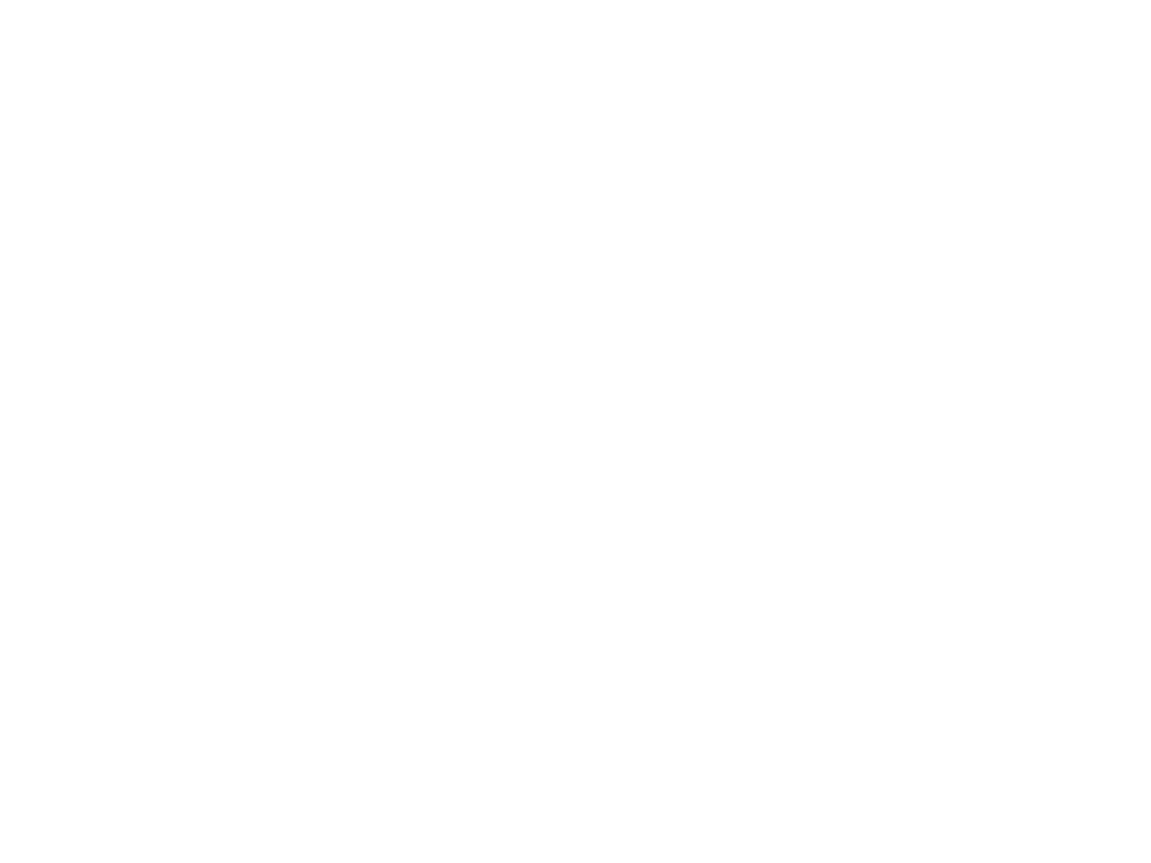

In [9]:
plot_tsne_3d(X_tsne, y)

### tsne-2d

In [10]:
tsne2d = manifold.TSNE(n_components=2, init='pca', random_state=0)
X_tsne_2d = tsne2d.fit_transform(X)

print X_tsne_2d
print X_tsne_2d.shape

[[ -52.0047966  -155.77488716]
 [ 140.9294536   114.22165754]
 [ -79.61919326   52.44484708]
 [-198.07229173   45.63263068]
 [  76.30095714  299.02761053]
 [-215.2241616  -211.73556795]
 [ 205.79431529 -130.99972488]
 [  76.21061737   -4.82148818]
 [-153.94952148  -77.78381731]
 [  23.95110288  118.08585589]
 [ 192.03598649   -5.40846231]
 [ -24.54293741  -39.58654216]
 [  71.48658307 -138.82999175]
 [ -87.31712481  175.27115056]]
(14, 2)


In [11]:
top3rows, top3bs = predit_bs_tsne(X_tsne_2d, y)

input X dims : 14 x 2
row 0 : dist=332.924074848
row 1 : dist=236.270059788
row 2 : dist=123.067294514
row 3 : dist=170.507632785
row 4 : dist=205.150038083
row 5 : dist=407.595890846
row 6 : dist=423.929434532
row 7 : dist=243.25846541
row 8 : dist=261.680517145
row 9 : dist=125.103063198
row 10 : dist=332.690972676
row 11 : dist=223.84018121
row 12 : dist=351.963272574
Top 3 distance : 123.067294514 , 125.103063198 ,170.507632785
Top 3 rows : 2 , 9 ,3
Top 3 ranking : 128 , 32 ,32


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


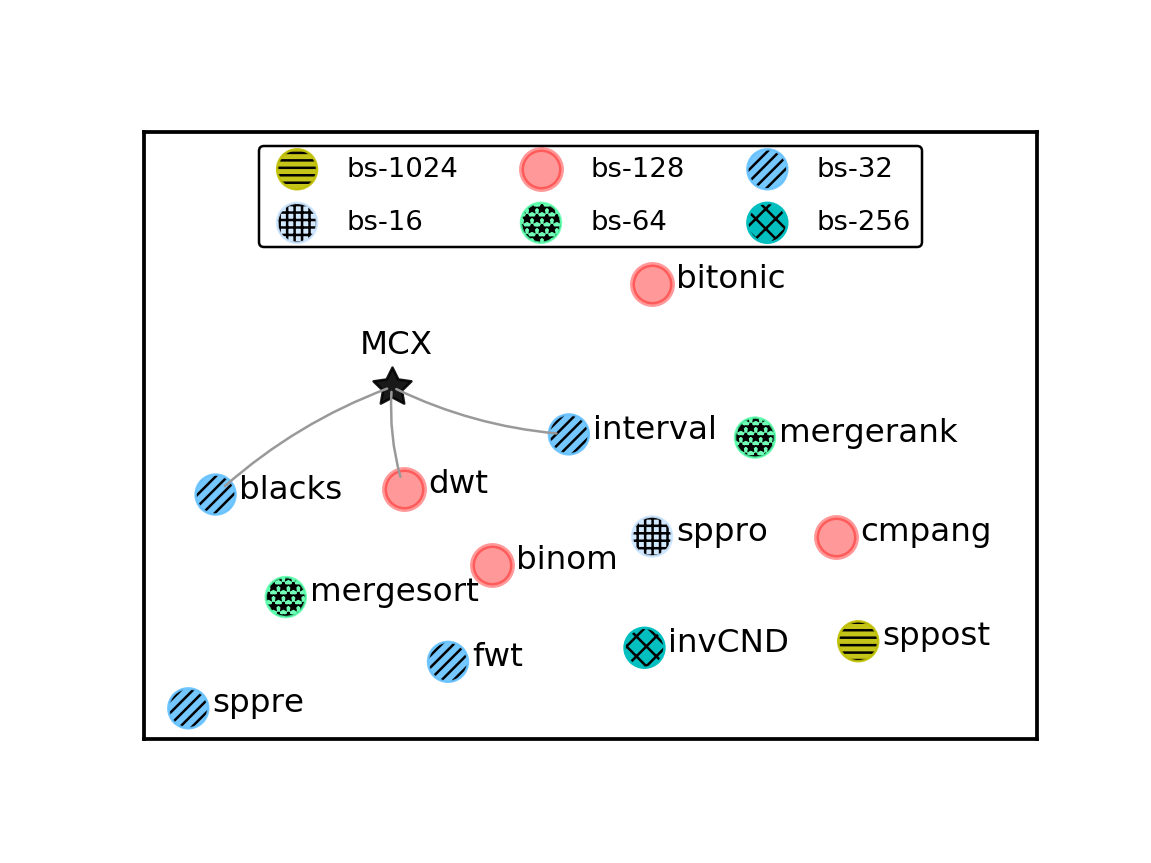

-243.053036088 227.168565504
-248.537008342 332.719207691


In [45]:
%load_ext autoreload
%autoreload 2


# interactive in notebook
%matplotlib notebook

from util_tsne import *




#plot_tsne_2d_v1(X_tsne_2d, y, y_name, top3rows)
plot_tsne_2d_v1(X_tsne_2d, y, y_name, top3rows, figname='tsne_mcx_t1e6', kernelname='MCX')